In [111]:
# Podstawowe
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import mercury as mr
from PIL import Image
from IPython.display import Markdown as md
import glob
import random

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# Do obróbki danych
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.preprocessing.image import ImageDataGenerator

# Do DL
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16

pd.options.display.float_format = '{:.2f}'.format

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po

In [2]:
app = mr.App(title="Prezentacja Projekt DL") 

mercury.App

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Koty vs Psy </h1>

<p style="text-align:center;
          color:#263a57;
          font-family:verdana;
          font-size:1.1em"> rozróżnianie kotów od psów <br></p>

<p style="padding-top:50px; 
          padding-left:100px;
          font-family:verdana;
          text-align:left; 
          margin-bottom:0;"> Prezentują:</p>          
<br>
<p style="padding-top:10px; 
          padding-left:125px;
          font-family:verdana;
          font-size:0.9em;
          text-align:left; 
          margin-top: 0;">Szymon Cyranowicz<br>Gabriela Piwar<br>Łukasz Sielicki </p>

<p style="text-align:right;
          font-family:verdana;
          font-size:0.9em;
          margin-top: 0;"> 26.11.2023 </p>

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Cel Projektu </h2>

<p style = "font-family:verdana;
            font-size:1.2em;"> 
            Zbudowanie modelu konwolucyjnych sieci neuronowych w celu rozpoznawania kotów i psów. </p>         
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.2em;">Stworzenie aplikacji do pomocy w odnajdywaniu swojego zwierzęcia domowego.</p>



<h2 style="color:#263a57; 
          font-family:verdana;"> Zbiór Danych </h2>
<p> Źródło: 
<a href="https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset">Cats-vs-Dogs</a>
</p> 

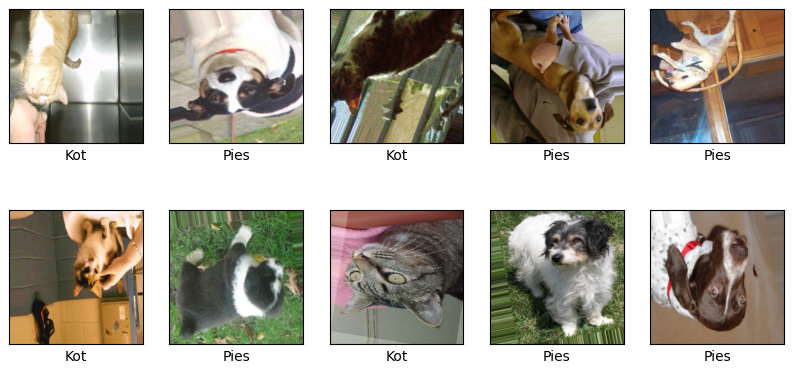

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Statystyki </h2>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            - Zaginione koty odnajdują się rzadziej niż psy. Do swoich właścicieli wraca 93% psów i 75% kotów.
</p>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            - 15% psów wróciło do swoich domów dzięki wszczepionemu czipowi. 
</p>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            - 15% opiekunów zwierząt zgłasza ich zaginięcie. Najważniejsza jest natychmiastowa reakacja po zaginięciu.
</p> 
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.1em;"> 
            - W 2021 roku w schronisku zarejestrowano 82 316 psów oraz 33 367 kotów, odsetek spadł o 11% (psy) i wzrósł o ok. 2% (koty) w porównaniu z poprzednim rokiem.
</p>  
<br>
<p> Źródło: 
<a href="https://www.psy.pl/artykuly/aktualnosci/ile-ginie-psow-i-kotow-badanie-aspca">psy.pl</a>
</p> 

<h2 style="color:#263a57;
          font-family:verdana;"> Wykorzystane modele </h2>
<p style = "font-family:verdana;
            padding-top:50px;
            font-size:1.2em;">
            1. Koty vs Psy - DenseNet121 (428 warstw)</p>
<p style = "font-family:verdana;
            padding-bottom:50px;
            font-size:1.2em;"> 2. Rasy Kotów - InceptionV3 (312 warstw) </p>

<h2 style="color:#263a57;
          font-family:verdana;"> DenseNet121 </h2>
<p style = "font-family:verdana;
            padding-bottom:50px;
            font-size:1.2em;">
            Model oparty na architekturze sieci konwolucyjnej w której wykorzystuje się tzw. połączenia każdy z każdym (warstwy Dense) pomiędzy warstwami w danym bloku konwolucyjnym. Dla zbioru ImageNet dokładność: 75%.  </p>

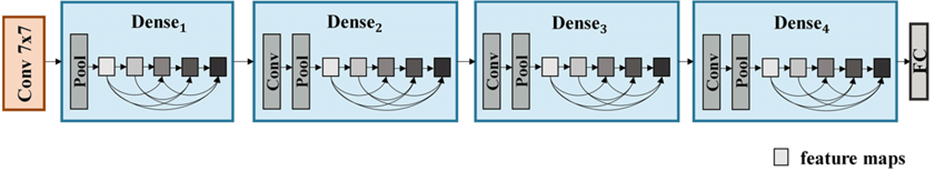



<h2 style="color:#263a57;
          font-family:verdana;"> InceptionV3 </h2>
<p style = "font-family:verdana;
            padding-bottom:25px;
            font-size:1.2em;">
            Model będący kulminacją wieloletnich badań mających na celu udoskonalenie sieci Inception wprowadzoną na podstawie sieci GoogleNet. Model zbudowany jest z symetrycznych i asymetrycznych bloków składowych z różnymi warstwami. Dla zbioru ImageNet dokładność: 78%.  </p>        

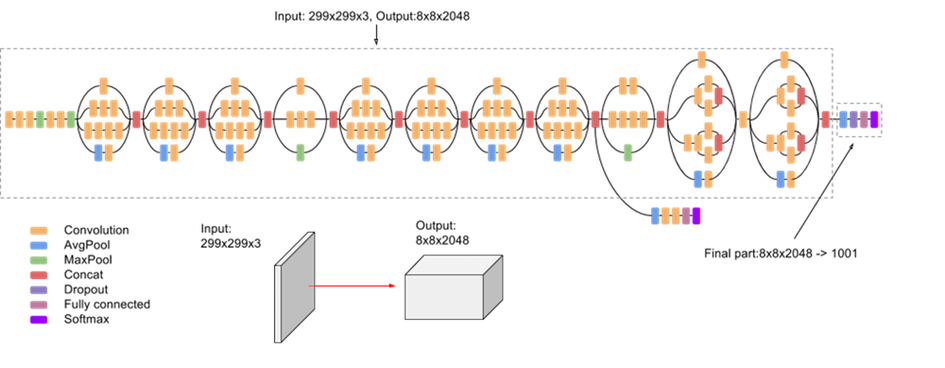

<h2 style="color:#263a57;
          font-family:verdana;"> Implementacja modeli </h2>

<p style = "font-family:verdana;
            padding-bottom:25px;
            font-size:1.2em;">
            W tabeli przedstawiono ostateczną architekturę wykorzystanych modeli. Sieci bazują na wczęśniej wspomnianych modela pretrenowanych, do których dodane zostały warstwy o wybranych hiperparametrach. Najistotniejszą różnicą między nimi jest rozmiar warstwy wyjściowej. </p> 
                
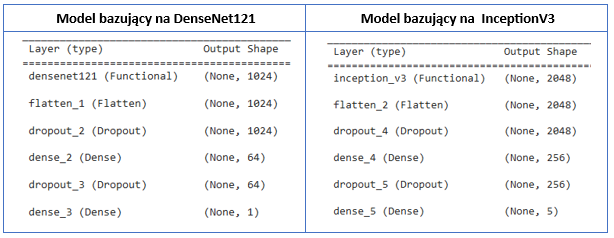   

<h2 style="color:#263a57;
          font-family:verdana;"> Ocena jakości modeli</h2>
          
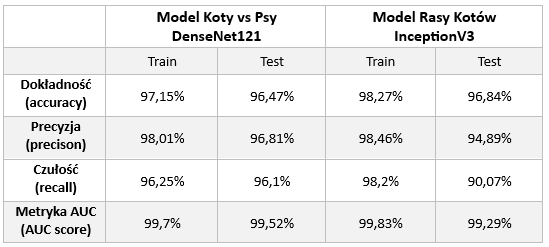          

In [240]:
# add checkbox
zwierze_input = mr.Select(value="pies", choices=['kot', 'pies'], label="zwierze")

mercury.Select

In [107]:
# add select widget
race_input = mr.Select(value='None', choices=['None', 'Bengal', 'Birman', 'British Shorthair', 'Maine Coon', 'Tuxedo'], label="rasa")

mercury.Select

In [206]:
cats_v_dogs_test_path = "Pets_split\Test"
breeds_test_path = "Cat_Breeds_Split5\Test"

test_gen = ImageDataGenerator(rescale=1./255)

cats_v_dogs_test = test_gen.flow_from_directory(
                    cats_v_dogs_test_path,
                    batch_size=20,
                    shuffle=False,
                    class_mode='binary',
                    target_size=(224, 224))

breeds_test = test_gen.flow_from_directory(
               breeds_test_path,
               batch_size=20,
               shuffle=False,
               class_mode='binary',
               target_size=(224, 224))


Found 200 images belonging to 2 classes.
Found 190 images belonging to 5 classes.


In [215]:
# Wyliczyłam raz przewidywane etykiety i zapisałam je do pliku tekstowego, aby mercury nie musiał robić predykcji przy
# każdej zmianie inputów. Poniżej kod jak zapisałam etykiety.

# Ścieżka do zapisanego modelu
#cats_v_dogs_model_path = 'dense_model_12ep.h5'
#breeds_model_path = 'breeds5_inc_model_30ep.h5'

# Wczytanie modelu
#dense_model_saved = load_model(cats_v_dogs_model_path)
#inc_model_saved = load_model(breeds_model_path)

# Predykcja
#dense_pred = dense_model_saved.predict(cats_v_dogs_test)
#inc_pred = inc_model_saved.predict(breeds_test)

# Przypisanie etykiet
#breed_labels = inc_pred.argmax(axis=1)
#cat_v_dog_labels = dense_pred.argmax(axis=1)

# Zapisanie do pliku
#np.savetxt('saved_breed_lables.txt', breed_labels)
#np.savetxt('saved_catvdog_lables.txt', cat_v_dog_labels)

In [237]:
# Wczytanie plików z predykowanymi etykietami. 
breed_labels = np.loadtxt('saved_breed_lables.txt').astype(np.int64)
cat_v_dog_labels = np.loadtxt('saved_catvdog_lables.txt').astype(np.int64)

In [209]:
# Stworzenie list z wszystkimi zdjęciami 
breeds_imgs = []
for filename in glob.glob('Cat_Breeds_Split5/Test/*/*.jpg'): 
    im = Image.open(filename)
    breeds_imgs.append(im)
    
cats_v_dogs_imgs = []
for filename in glob.glob('Pets_split/Test/*/*.jpg'): 
    im = Image.open(filename)
    cats_v_dogs_imgs.append(im)

In [238]:
#Stworzenie DataFrame ze zdjęciami i przewidywanymi etykietami

# Koty i Psy
catvdog_combined = list(zip(cats_v_dogs_imgs, cat_v_dog_labels))
catvdog_data = pd.DataFrame(catvdog_combined, columns = ['image', 'pred'])
catvdog_data['pred_label'] = ['kot' if i==0 else 'pies' for i in catvdog_data['pred']]

#Rasy kotów
breeds_combined = list(zip(breeds_imgs, breed_labels))
breeds_data = pd.DataFrame(breeds_combined, columns = ['image', 'pred'])
#Odwrócenie słownika z klasami zdjęć
inv_map = {v: k for k, v in breeds_test.class_indices.items()}
breeds_data['pred_label'] = breeds_data['pred'].map(inv_map)

<h2 style="color:#263a57;
          font-family:verdana;"> Aplikacja </h2>

#### Wprowadzone dane

,zwierze,rasa
0,kot,None


#### Zdjęcia

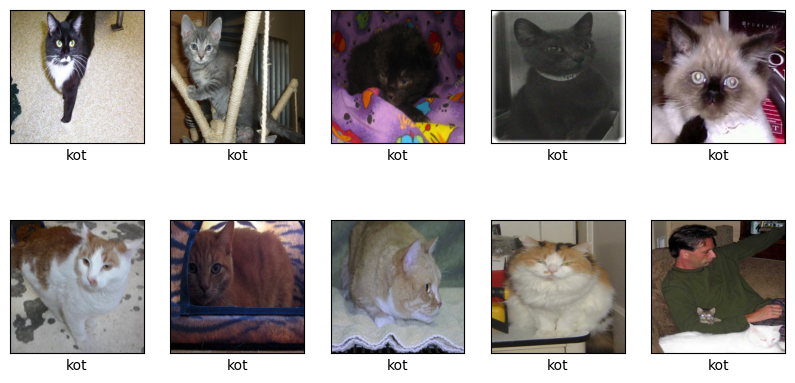

In [239]:
display(md("#### Wprowadzone dane"))
inputs = {'zwierze': [zwierze_input.value], 'rasa': [race_input.value]}

inputs_df = pd.DataFrame(inputs)
display(inputs_df)

display(md("#### Zdjęcia"))

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if race_input.value == 'None':
        image = random.choice(catvdog_data[catvdog_data['pred_label'] == zwierze_input.value].to_numpy())[0]
        plt.imshow(image.resize((224, 224)))
        plt.xlabel(zwierze_input.value)
    else:
        image = random.choice(breeds_data[breeds_data['pred_label'] == race_input.value].to_numpy())[0]
        plt.imshow(image.resize((224, 224)))
        plt.xlabel(race_input.value)
        
plt.show()

<h2 style="color:#263a57;
          font-family:verdana;"> Cel Biznesowy </h2>

<h2 style="color:#263a57; 
           font-family:verdana;
           padding-bottom:50px;"> Wnioski </h2>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            1. Sieć DenseNet121 znacznie poprawiła miary oceny klasyfikacji binarnej.
</p>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            2. Aplikacja mogłaby służyć jako dobre rozwiązanie do odnajdywania zwierząt domowych.
</p>
<p style = "font-family:verdana;
            font-size:1.1em;"> 
            3. 
</p> 
<p style = "padding-bottom:50px; 
            font-family:verdana;
            font-size:1.1em;"> 
            4. 
</p>  
  

<h1 style="text-align:center; 
          color:#263a57; 
          font-family:verdana;"> Dziękujemy za uwagę! </h1>